# **01 PyTorch Workflow:** Exercises & Extra-curriculum

In [1]:
import torch
import matplotlib.pyplot as plt 

# Check python version
print(f"PyTorch and cuda version: {torch.__version__}")
if torch.cuda.is_available():
    device = "cuda"
    print("Accelerator/Cuda/GPU is available!")
else:
    device = "cpu"
    print("Accelerator/Cuda/GPU is not available ;C, CPU mode")

PyTorch and cuda version: 1.13.1+cu117
Accelerator/Cuda/GPU is available!


#### **1.** Create a straight line dataset using the linear regression formula (weight * X + bias).
* Set weight=0.3 and bias=0.9 there should be at least 100 datapoints total.<br>
* Split the data into 80% training, 20% testing.<br>
* Plot the training and testing data so it becomes visual.<br>

In [2]:
# Parameters
weight = 0.3
bias = 0.9

# Data
X = torch.arange(0, 100, 1, dtype=torch.float32).unsqueeze(dim=1)

y = X * weight + bias 

In [3]:
# Split
train_split = int(len(X) * 0.8) 

## Train
X_train = X[:train_split]
y_train = y[:train_split]

# Test 
X_test = X[train_split:]
y_test = y[train_split:]


In [4]:
len(X_train), len(X_test), len(y_train), len(y_test)

(80, 20, 80, 20)

In [5]:
def plot_data(X_train=X_train, 
              X_test=X_test, 
              y_train=y_train,
              y_test=y_test,
              preds=None):
    '''
    Plots the data and, if it's given, prediction
    '''
    
    plt.figure(figsize=(10, 7))    

    # Plot train data in red
    plt.scatter(X_train, y_train, c="r", s=8, label="Training data")
    
    # Plot test data in blue 
    plt.scatter(X_test, y_test, c="b", s=8, label="Test data")

    # Plot prediction in green 
    if preds is not None:
        plt.scatter(X_test, preds, c="g", s=8, label="Inference")
    
    plt.legend()


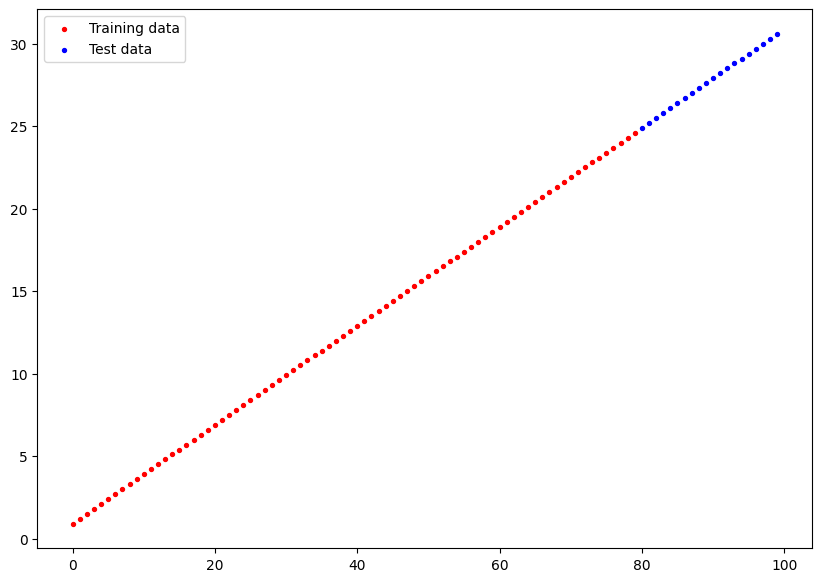

In [6]:
plot_data()

#### **2.** Build a PyTorch model by subclassing nn.Module.

* Inside should be a randomly initialized nn.Parameter() with requires_grad=True, one for weights and one for bias.<br>
* Implement the forward() method to compute the linear regression function you used to create the dataset in 1.<br>
* Once you've constructed the model, make an instance of it and check its state_dict().<br>

In [7]:
class LinearModel(torch.nn.Module):
    def __init__(self):
        super().__init__()
        
        ################ LINEAR LAYER #################
        self.linear_layer = torch.nn.Linear(in_features=1,
                                       out_features=1)
        ###############################################
        
    def forward(self, X:torch.Tensor) -> torch.Tensor:
        return self.linear_layer(X)

In [8]:
torch.manual_seed(123)
model = LinearModel()
model.state_dict()

OrderedDict([('linear_layer.weight', tensor([[-0.4078]])),
             ('linear_layer.bias', tensor([0.0331]))])

#### **3.** Create a loss function and optimizer using nn.L1Loss() and torch.optim.SGD(params, lr) respectively.

* Set the learning rate of the optimizer to be 0.01 and the parameters to optimize should be the model parameters from the model you created in 2.<br>
* Write a training loop to perform the appropriate training steps for 300 epochs.<br>
* The training loop should test the model on the test dataset every 20 epochs.<br>


In [9]:
# Loss function and optimizer 
loss_fn = torch.nn.L1Loss()
optimizer = torch.optim.SGD(params=model.parameters(),
                            lr=0.0001)

In [10]:
X_train.dtype

torch.float32

In [31]:
# Move model and data to GPU
model.to(device)
X_train = X_train.to(device)
X_test = X_test.to(device)
y_train = y_train.to(device)
y_test = y_test.to(device)
X_train.device, X_test.device, y_train.device, y_test.device, next(model.parameters()).device


(device(type='cuda', index=0),
 device(type='cuda', index=0),
 device(type='cuda', index=0),
 device(type='cuda', index=0),
 device(type='cuda', index=0))

In [32]:
torch.manual_seed(123)
epochs = 300
# Training loop
for epoch in range(epochs):
    # 0. Training mode
    model.train()
    
    # 1. Forward pass
    y_pred = model(X_train)
    
    # 2. Calculate loss
    train_loss = loss_fn(y_pred, y_train)
    
    # 3. Zero gradient
    optimizer.zero_grad()
    
    # 4. Backpropagation 
    train_loss.backward()
    
    # 5. Gradient descent
    optimizer.step()
     
        
    # Tracking 
    if epoch % 30 == 0:
        # Testing 
        with torch.inference_mode():
            model.eval()
            
            # 1. Inference
            test_pred = model(X_test)
            
            # 2. Loss
            test_loss = loss_fn(test_pred, y_test)
        print(f"Epoch: {epoch} | Loss: {train_loss} | Test loss: {test_loss}")

Epoch: 0 | Loss: 28.824033737182617 | Test loss: 63.85921096801758
Epoch: 30 | Loss: 24.140283584594727 | Test loss: 53.250465393066406
Epoch: 60 | Loss: 19.456533432006836 | Test loss: 42.64171600341797
Epoch: 90 | Loss: 14.772783279418945 | Test loss: 32.03296661376953
Epoch: 120 | Loss: 10.089033126831055 | Test loss: 21.42421531677246
Epoch: 150 | Loss: 5.405282497406006 | Test loss: 10.81546401977539
Epoch: 180 | Loss: 0.7215321660041809 | Test loss: 0.20671367645263672
Epoch: 210 | Loss: 0.35413575172424316 | Test loss: 0.5003671050071716
Epoch: 240 | Loss: 0.3535912334918976 | Test loss: 0.5087812542915344
Epoch: 270 | Loss: 0.35308289527893066 | Test loss: 0.504664421081543


#### **4.** Make predictions with the trained model on the test data.

* Visualize these predictions against the original training and testing data (note: you may need to make sure the predictions are not on the GPU if you want to use non-CUDA-enabled libraries such as matplotlib to plot).

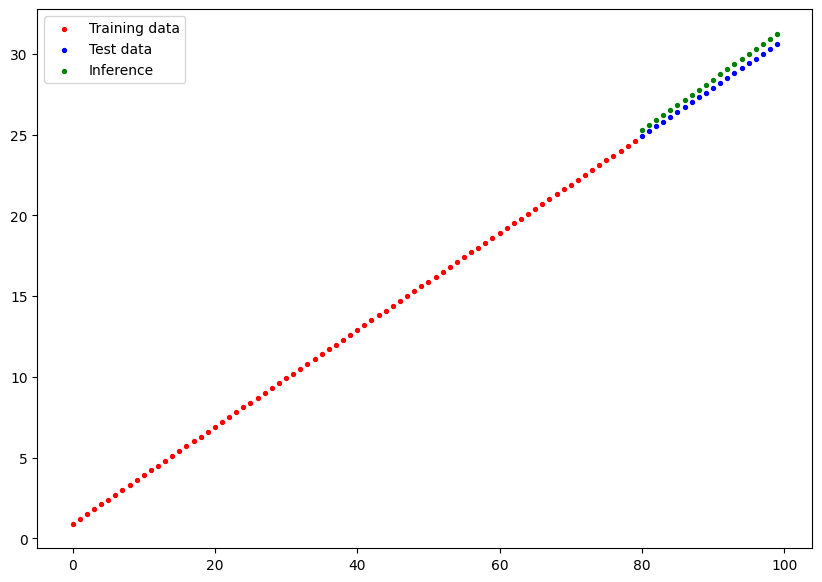

In [35]:
with torch.inference_mode():
    model.eval()
    inference = model(X_test)
plot_data(preds=inference.cpu())

#### **5.** Save your trained model's state_dict() to file.

* Create a new instance of your model class you made in 2. and load in the state_dict() you just saved to it.<br>
* Perform predictions on your test data with the loaded model and confirm they match the original model predictions from 4.<br>

In [42]:
# Save state_dict 
torch.save(obj=model.state_dict(),
           f="./models/01_exercises_model.pth")

In [ ]:
# Load state_dict
model_loaded = LinearModel()
model_loaded.load_state_dict(state_dict=torch.load("./models/01_exercises_model.pth"))

<All keys matched successfully>

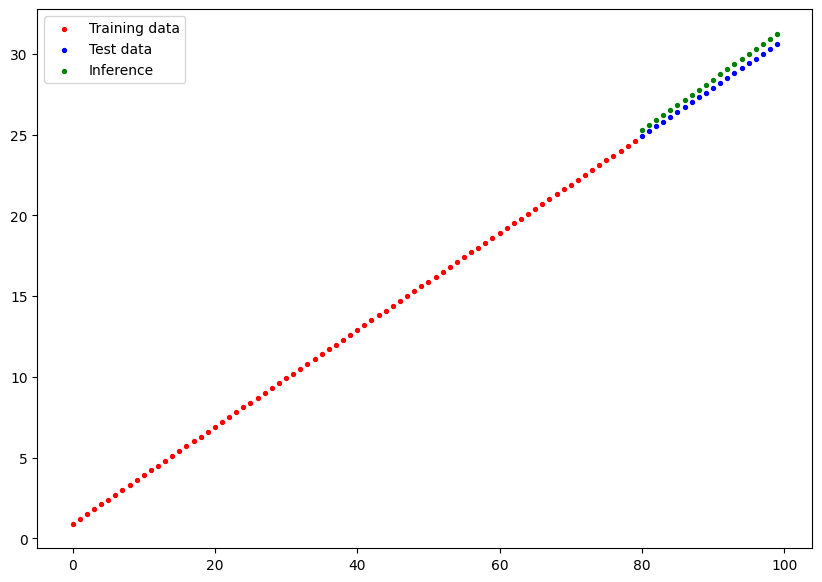

In [45]:
# Make predictions 
with torch.inference_mode():
    model_loaded.eval()
    loaded_pred = model_loaded(X_test.cpu())
plot_data(preds=loaded_pred)